In [8]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [9]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [4]:
import splitfolders
splitfolders.ratio('dataset', output="split", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 3076 files [00:02, 1137.23 files/s]


In [5]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'dataset/train'
valid_path = 'dataset/test'

In [6]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:

  # useful for getting number of output classes
folders = glob('split/train/*')

In [28]:
# our layers - you can add more if you want
x = Flatten()(inception.output)


In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 22,161,191 (84.54 MB)

 Trainable params: 358,407 (1.37 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('split/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2457 images belonging to 7 classes.


In [15]:
test_set = test_datagen.flow_from_directory('split/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 7 classes.


In [16]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=78,
  validation_steps=9
)

Epoch 1/20


C:\Users\KIIT\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/78 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3353 - loss: 10.7322

C:\Users\KIIT\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


78/78 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.3365 - loss: 10.6811 - val_accuracy: 0.4340 - val_loss: 3.7553
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.5275 - loss: 3.3032 - val_accuracy: 0.4815 - val_loss: 1.4789
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.6233 - loss: 2.5701 - val_accuracy: 0.5625 - val_loss: 2.9681
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.6812 - loss: 1.9445 - val_accuracy: 0.6296 - val_loss: 1.3033
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.6923 - loss: 1.9565 - val_accuracy: 0.5833 - val_loss: 2.8017
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.7115 - loss: 1.7174 - val_accuracy: 0.6667 - val_loss: 1.3712
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.7337 - loss: 1.8457 - val_accuracy: 0.6007 - val_loss: 3.9794
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7409 - loss: 1.6829 - val_accuracy: 0.6296 - val_loss: 1

In [17]:
import matplotlib.pyplot as plt


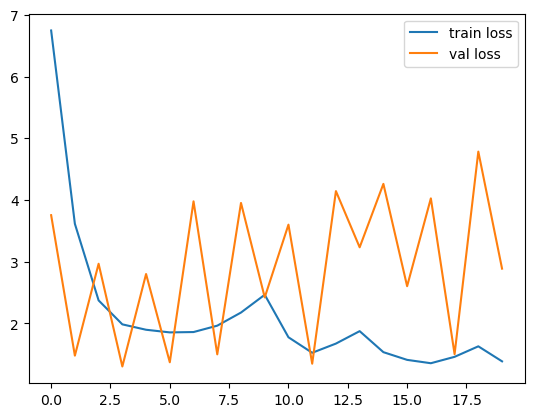

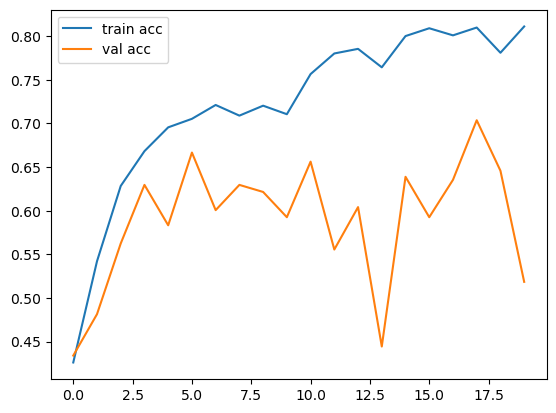

<Figure size 640x480 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [20]:
y_pred = model.predict(test_set)

10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step


In [21]:
y_pred

array([[9.9506807e-01, 4.9319374e-03, 8.6994718e-28, ..., 1.2796848e-12,
        2.4106729e-14, 5.8803072e-17],
       [5.0316729e-02, 8.5663942e-07, 0.0000000e+00, ..., 1.5496105e-16,
        9.4968235e-01, 1.0382555e-21],
       [2.2898092e-15, 5.9303250e-11, 2.7170596e-22, ..., 1.6570127e-11,
        1.0000000e+00, 8.9292294e-17],
       ...,
       [5.0028787e-10, 1.8263647e-09, 9.9972814e-01, ..., 1.1972185e-08,
        6.2110281e-09, 2.7189267e-04],
       [1.0000000e+00, 8.3791779e-11, 0.0000000e+00, ..., 1.7736818e-26,
        1.4515011e-12, 1.3970676e-19],
       [1.8936041e-07, 9.0611586e-08, 1.5245682e-08, ..., 4.8836249e-05,
        9.9995089e-01, 6.6092576e-09]], dtype=float32)

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([0, 5, 5, 0, 1, 0, 2, 6, 5, 1, 0, 6, 4, 0, 1, 0, 1, 0, 2, 6, 5, 1,
       1, 0, 6, 0, 0, 1, 5, 1, 6, 6, 0, 0, 6, 1, 1, 5, 0, 1, 5, 6, 5, 0,
       6, 0, 6, 1, 0, 1, 6, 6, 0, 5, 2, 5, 1, 0, 5, 1, 1, 0, 2, 6, 0, 4,
       6, 0, 0, 0, 1, 5, 4, 6, 0, 0, 5, 0, 0, 1, 0, 5, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 6, 5, 1, 0, 1, 3, 2, 6, 0, 1, 6, 6, 1, 2, 5, 0, 1, 0, 1,
       6, 2, 0, 0, 1, 5, 4, 1, 0, 6, 2, 4, 0, 5, 0, 5, 0, 5, 6, 6, 0, 1,
       6, 6, 0, 5, 4, 5, 1, 1, 2, 6, 2, 0, 5, 5, 5, 4, 1, 4, 5, 6, 1, 6,
       1, 5, 5, 6, 6, 0, 4, 6, 0, 5, 1, 2, 6, 5, 0, 0, 6, 1, 0, 5, 5, 5,
       5, 1, 6, 2, 0, 5, 1, 0, 5, 6, 4, 6, 5, 4, 2, 4, 0, 4, 0, 0, 2, 5,
       1, 0, 6, 1, 4, 5, 0, 0, 2, 5, 4, 4, 6, 1, 6, 5, 2, 5, 2, 6, 4, 1,
       4, 6, 6, 6, 6, 1, 1, 5, 2, 0, 1, 1, 0, 0, 3, 5, 1, 1, 5, 0, 1, 1,
       0, 4, 6, 0, 0, 1, 0, 2, 6, 0, 5, 1, 1, 0, 5, 0, 5, 4, 6, 6, 0, 1,
       0, 5, 2, 1, 1, 6, 6, 1, 0, 4, 5, 0, 5, 0, 1, 1, 5, 6, 1, 2, 4, 5,
       1, 1, 2, 1, 5, 2, 5, 4, 1, 1, 0, 6, 0, 4, 1,